## Primitive Multiple Linear Regression Workflow

A baseline multiple linear regression model was implemented following a standard, minimal workflow to establish a reference performance.

### 1️⃣ Define Target Variable (y)
The target variable represents the quantity to be predicted.  
In this study, the target is **Energy_Consumption_kWh**.

### 2️⃣ Define Feature Set (X)
The feature matrix consists of all available numerical predictors after preprocessing, excluding the target variable and non-numerical identifiers.  
No feature engineering or interaction terms were applied at this stage.

### 3️⃣ Train–Test Split
The dataset was split into training and testing subsets to ensure unbiased model evaluation, with the test set used exclusively for performance assessment.

### 4️⃣ Model Fitting
A multiple linear regression model based on **Ordinary Least Squares (OLS)** was trained using the training data.

### 5️⃣ Prediction
The trained model was used to predict energy consumption values for the unseen test data.

### 6️⃣ Model Evaluation
Model performance was evaluated using standard regression metrics:
- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- Coefficient of Determination (R²)

The baseline model achieved strong performance, indicating a predominantly linear relationship between the predictors and energy consumption.

### 7️⃣ Coefficient Inspection
Model coefficients were examined to assess:
- The direction of influence (positive or negative)
- The relative magnitude of each feature’s effect
- Physical interpretability in the context of vehicle operation and environmental conditions

This primitive model serves as a baseline for comparison with more advanced models and feature engineering strategies.

In [2]:
import numpy as np
import pandas as pd


In [3]:
df = pd.read_csv("../data/processed/EV_Energy_Consumption_Dataset_Processed.csv")

In [4]:
df.head()

,Timestamp,Speed_kmh,Acceleration_ms2,Battery_State_%,Battery_Voltage_V,Battery_Temperature_C,Driving_Mode,Road_Type,Traffic_Condition,Slope_%,Weather_Condition,Temperature_C,Humidity_%,Wind_Speed_ms,Tire_Pressure_psi,Vehicle_Weight_kg,Distance_Travelled_km,Energy_Consumption_kWh
0,2024-01-01 00:00:00,1.512261,-1.597302,-1.288566,0.931220,-0.219219,2,1,1,1.003288,4,-1.274310,-0.651295,0.074951,-0.194021,-0.084979,-0.297404,12.054317
1,2024-01-01 00:01:00,-0.310036,-0.450723,1.607332,1.436195,-0.925606,1,2,1,-1.264077,4,-1.600160,0.085135,-0.695838,0.000483,0.634587,-1.709447,4.488701
2,2024-01-01 00:02:00,1.431887,0.158739,1.067984,1.652836,1.691468,1,1,3,-0.567630,1,-0.620155,0.680914,-0.545800,1.157385,-0.101746,1.112583,11.701377
3,2024-01-01 00:03:00,-0.600724,-1.213092,-1.359363,0.242011,0.146791,1,2,2,1.322638,3,-1.110771,1.554430,-0.690587,0.868859,-1.529829,-1.382153,7.389266
4,2024-01-01 00:04:00,-0.062018,0.868717,-1.317754,-1.388900,0.566627,2,1,1,0.062408,2,-0.043250,-1.394544,-0.749518,1.029315,0.817966,-1.345600,6.761205


In [5]:
y = df['Energy_Consumption_kWh']
# LinearRegression can only work with numbers
X = df.drop(columns = ['Energy_Consumption_kWh', 'Timestamp'])

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size = 0.2, 
    random_state = 42
)

In [7]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [8]:
y_pred = model.predict(X_test)

In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 0.4101480584005803
Root Mean Squared Error: 0.5101264774096782
R^2 Score: 0.9463362880475882


In [10]:
mean_y = np.mean(y)

mape_like = (mae / mean_y) * 100
print(f"MAE as % of mean y: {mape_like:.2f}%")

MAE as % of mean y: 4.86%


In [11]:
rmse_percent = (rmse / np.mean(y)) * 100
print(f"RMSE as % of mean y: {rmse_percent:.2f}%")

RMSE as % of mean y: 6.05%


In [10]:
coefficients = pd.Series(model.coef_, index = X.columns).sort_values(ascending = False)
print(coefficients)


Speed_kmh                1.715150
Distance_Travelled_km    1.001369
Humidity_%               0.396979
Battery_Temperature_C    0.292144
Slope_%                  0.180334
Wind_Speed_ms            0.143591
Driving_Mode             0.085081
Road_Type                0.070016
Traffic_Condition        0.045181
Vehicle_Weight_kg        0.026370
Battery_Voltage_V        0.005168
Acceleration_ms2        -0.005882
Weather_Condition       -0.006897
Temperature_C           -0.007573
Tire_Pressure_psi       -0.046801
Battery_State_%         -0.455718
dtype: float64


In [11]:
print(model.intercept_)

8.050931871314146


## Residual Analysis

Residual analysis was performed to evaluate the validity of the linear regression assumptions and to diagnose potential model deficiencies.

### Residuals vs Predictions
The residuals versus predicted values plot shows a random scatter of points centered around zero, with no visible curvature or systematic pattern. The variance of residuals remains approximately constant across the prediction range.

This indicates that the model does not exhibit systematic bias and that the linearity and homoscedasticity assumptions are reasonably satisfied.

### Residual Distribution
The residual distribution is approximately symmetric and bell-shaped, centered near zero. This suggests that the prediction errors resemble random noise and are not heavily skewed.

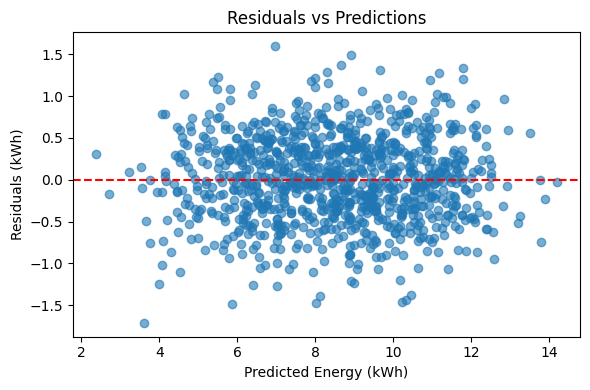

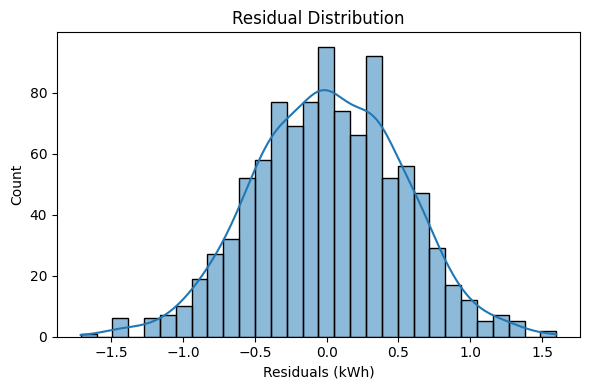

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# residuals
residuals = y_test - y_pred

# 1) Residuals vs Predictions
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted Energy (kWh)")
plt.ylabel("Residuals (kWh)")
plt.title("Residuals vs Predictions")
plt.tight_layout()
plt.show()

# 2) Residual distribution
plt.figure(figsize=(6,4))
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residuals (kWh)")
plt.title("Residual Distribution")
plt.tight_layout()
plt.show()